<a href="https://colab.research.google.com/github/diwanshu674/Data-Science-Project/blob/main/amazon_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
df = pd.read_csv('Amazon.csv')
df.head()


,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
print(df.shape)
print(df.info())
df.describe()


(54310, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54310 entries, 0 to 54309
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        54310 non-null  object 
 1   OrderDate      54310 non-null  object 
 2   CustomerID     54310 non-null  object 
 3   CustomerName   54310 non-null  object 
 4   ProductID      54310 non-null  object 
 5   ProductName    54310 non-null  object 
 6   Category       54310 non-null  object 
 7   Brand          54310 non-null  object 
 8   Quantity       54310 non-null  int64  
 9   UnitPrice      54310 non-null  float64
 10  Discount       54310 non-null  float64
 11  Tax            54310 non-null  float64
 12  ShippingCost   54310 non-null  float64
 13  TotalAmount    54310 non-null  float64
 14  PaymentMethod  54310 non-null  object 
 15  OrderStatus    54309 non-null  object 
 16  City           54309 non-null  object 
 17  State          54309 non-null  object 

,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount
count,54310.000000,54310.000000,54310.000000,54310.000000,54310.000000,54310.000000
mean,2.999429,302.490707,0.074147,68.429251,7.388675,917.255233
std,1.412500,172.000123,0.082552,74.080805,4.322865,725.695404
min,1.000000,5.000000,0.000000,0.000000,0.000000,6.190000
25%,2.000000,153.210000,0.000000,15.960000,3.660000,340.487500
50%,3.000000,301.730000,0.050000,45.260000,7.270000,710.715000
75%,4.000000,451.117500,0.100000,95.947500,11.120000,1343.080000
max,5.000000,599.990000,0.300000,538.460000,15.000000,3534.980000


In [10]:
df.isnull().sum()


,0
OrderID,0
OrderDate,0
CustomerID,0
CustomerName,0
ProductID,0
ProductName,0
Category,0
Brand,0
Quantity,0
UnitPrice,0


In [11]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])


In [12]:
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month
df['Day'] = df['OrderDate'].dt.day


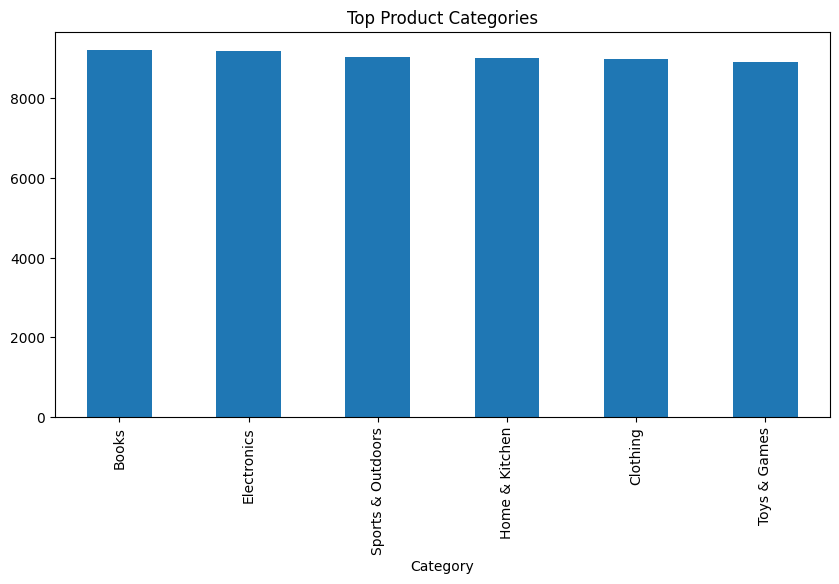

In [13]:
plt.figure(figsize=(10,5))
df['Category'].value_counts().plot(kind='bar')
plt.title("Top Product Categories")
plt.show()


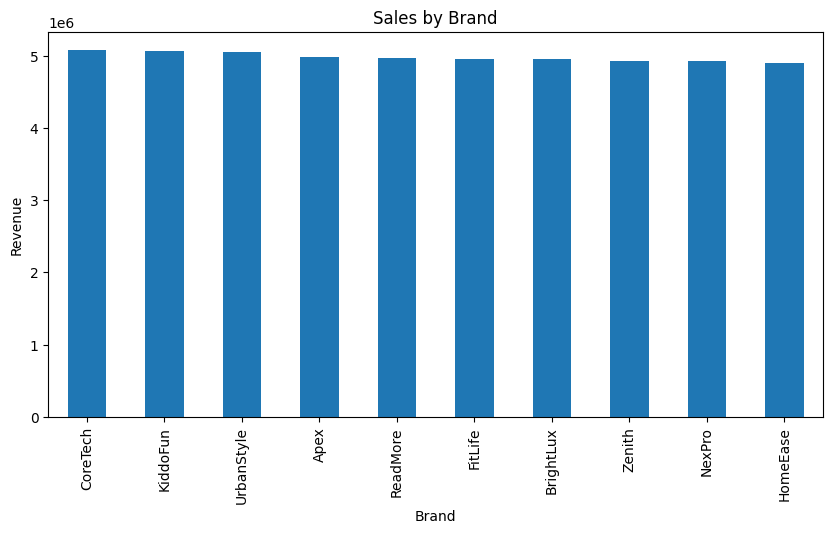

In [14]:
plt.figure(figsize=(10,5))
df.groupby('Brand')['TotalAmount'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Sales by Brand")
plt.ylabel("Revenue")
plt.show()


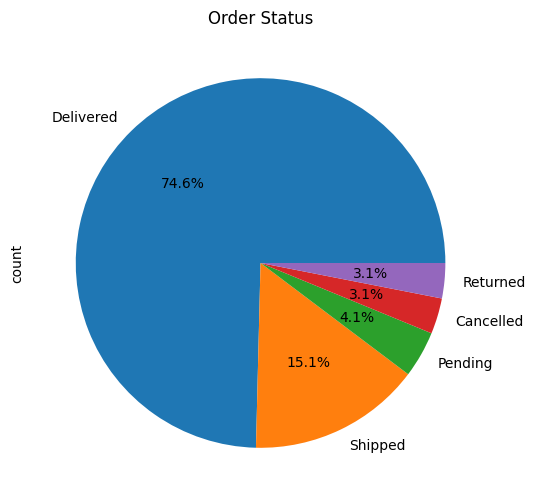

In [15]:
df['OrderStatus'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Order Status")
plt.show()


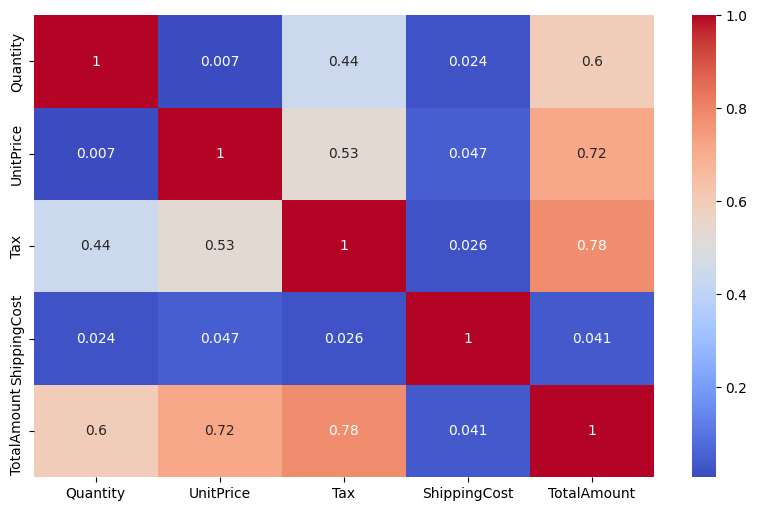

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Quantity','UnitPrice','Tax','ShippingCost','TotalAmount']].corr(), annot=True, cmap='coolwarm')
plt.show()


In [17]:
df_ml = df.copy()
le = LabelEncoder()

for col in ['Category','Brand','PaymentMethod','City','State','Country','OrderStatus']:
    df_ml[col] = le.fit_transform(df_ml[col])


In [18]:
X = df_ml[['Quantity','UnitPrice','Discount','Tax','ShippingCost','Category','Brand','PaymentMethod']]
y = df_ml['OrderStatus']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7428929150095743

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       406
           1       0.74      1.00      0.85     10104
           2       0.00      0.00      0.00       539
           3       0.00      0.00      0.00       413
           4       0.14      0.00      0.00      2116

    accuracy                           0.74     13578
   macro avg       0.18      0.20      0.17     13578
weighted avg       0.58      0.74      0.63     13578


Confusion Matrix:
 [[    0   406     0     0     0]
 [    2 10084     2     0    16]
 [    0   537     0     0     2]
 [    0   413     0     0     0]
 [    0  2112     1     0     3]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


UnitPrice        0.227450
ShippingCost     0.224960
Tax              0.209206
Brand            0.093156
Discount         0.066436
PaymentMethod    0.064142
Category         0.061367
Quantity         0.053283
dtype: float64


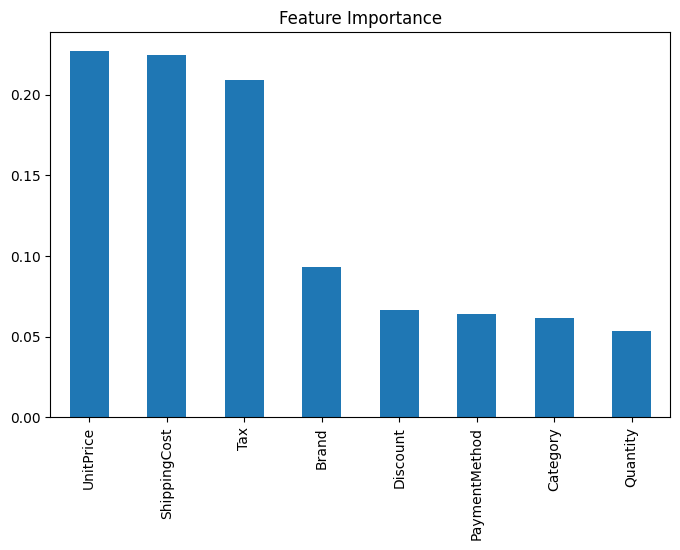

In [23]:
importances = model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feat_imp)

plt.figure(figsize=(8,5))
feat_imp.plot(kind='bar')
plt.title("Feature Importance")
plt.show()
